## 1. Importing libraries and data

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [31]:
%matplotlib inline

In [32]:
path = r'C:\Users\Yan Peng\LA Crimes'

In [33]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'crime_data_agg_ym.csv'),  index_col = 0)

In [34]:
df.shape

(1029, 8)

In [35]:
df.head()

,year_month,area_name,VEHICLE - STOLEN,BATTERY - SIMPLE ASSAULT,THEFT OF IDENTITY,BURGLARY FROM VEHICLE,BURGLARY,area_crime_rate
0,2020-01,77TH STREET,123,94,70,75,50,High crime rate
1,2020-01,CENTRAL,45,172,30,144,23,High crime rate
2,2020-01,DEVONSHIRE,40,53,51,67,54,Low crime rate
3,2020-01,FOOTHILL,69,51,45,37,35,Low crime rate
4,2020-01,HARBOR,77,49,25,29,42,Medium crime rate


### Extract relevant columns

In [36]:
sub = df[['VEHICLE - STOLEN', 'BATTERY - SIMPLE ASSAULT', 'THEFT OF IDENTITY', 'BURGLARY FROM VEHICLE', 'BURGLARY']]

In [37]:
sub.shape

(1029, 5)

In [38]:
sub.head()

,VEHICLE - STOLEN,BATTERY - SIMPLE ASSAULT,THEFT OF IDENTITY,BURGLARY FROM VEHICLE,BURGLARY
0,123,94,70,75,50
1,45,172,30,144,23
2,40,53,51,67,54
3,69,51,45,37,35
4,77,49,25,29,42


## 2. The elbow technique

In [39]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [ ]:
score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))] # Creates a score that represents 
#a rate of variation for the given cluster option.

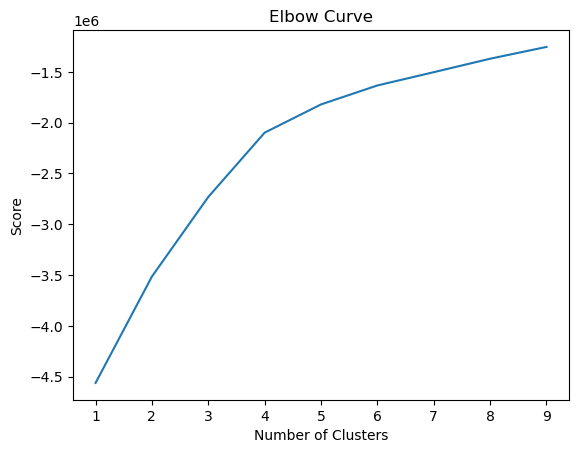

In [41]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### The slope starts to flatten at 4. So we choose 3 clusters.

## 3. k-means clustering

In [42]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3)

In [ ]:
# Fit the k-means object to the data.
kmeans.fit(sub)

In [ ]:
sub['clusters'] = kmeans.fit_predict(sub)

In [45]:
sub.head()

,VEHICLE - STOLEN,BATTERY - SIMPLE ASSAULT,THEFT OF IDENTITY,BURGLARY FROM VEHICLE,BURGLARY,clusters
0,123,94,70,75,50,1
1,45,172,30,144,23,2
2,40,53,51,67,54,0
3,69,51,45,37,35,0
4,77,49,25,29,42,0


In [46]:
sub['clusters'].value_counts()

clusters
0    722
1    274
2     33
Name: count, dtype: int64

### "BURGLARY FROM VEHICLE" vs. "BATTERY - SIMPLE ASSAULT"

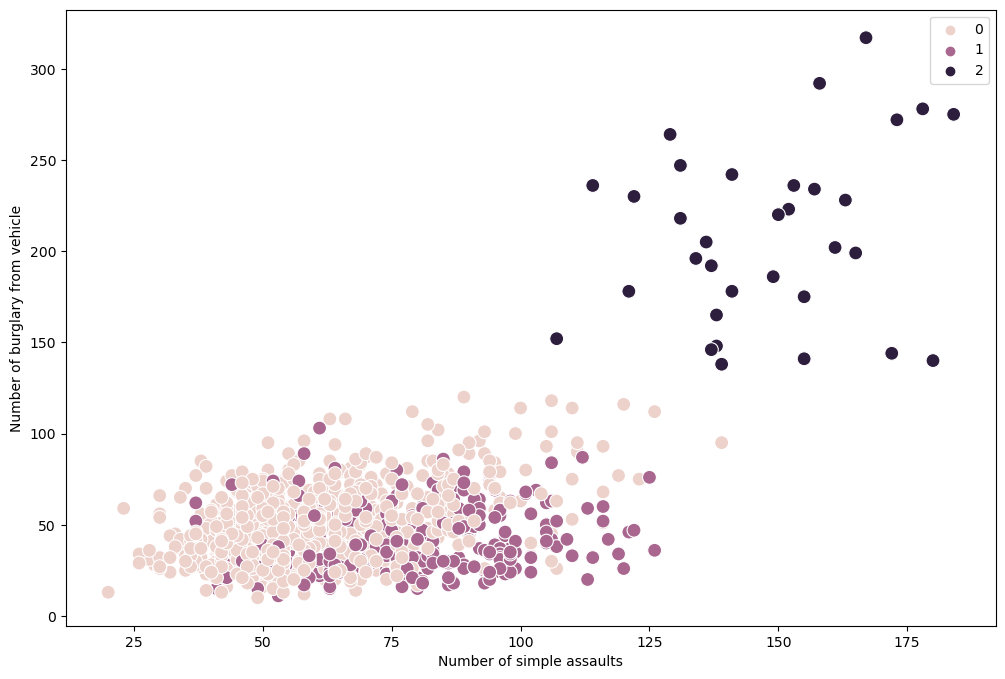

In [47]:
# Plot the clusters for the "BURGLARY FROM VEHICLE" and "BATTERY - SIMPLE ASSAULT" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['BATTERY - SIMPLE ASSAULT'], y=sub['BURGLARY FROM VEHICLE'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Number of simple assaults')
plt.ylabel('Number of burglary from vehicle')
plt.show()

#### To better see the clusters, they are displayed separately in the following.

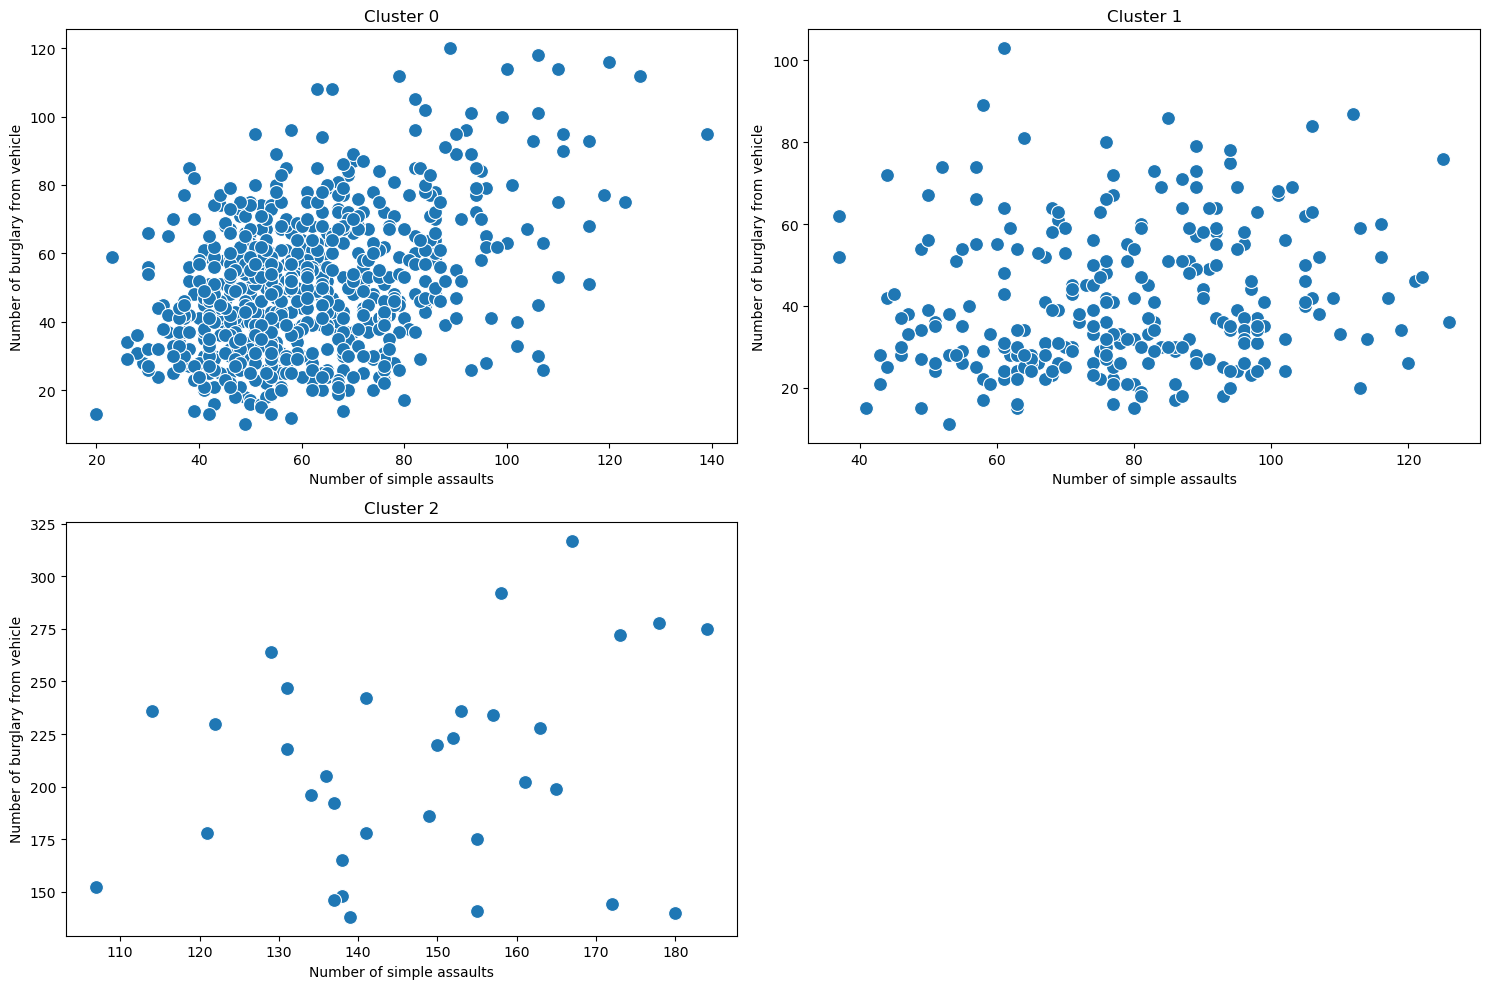

In [48]:
# Assuming kmeans.labels_ is the array containing k-means labels
n_clusters = len(set(kmeans.labels_))

plt.figure(figsize=(15, 10))

for cluster_label in range(n_clusters):
    # Filter the data for each cluster
    cluster_data = sub[kmeans.labels_ == cluster_label]
    
    # Plot the scatter plot for each cluster
    plt.subplot(2, 2, cluster_label + 1)  # Adjust the subplot layout accordingly
    ax = sns.scatterplot(x=cluster_data['BATTERY - SIMPLE ASSAULT'], y=cluster_data['BURGLARY FROM VEHICLE'], s=100)
    
    ax.grid(False)
    plt.xlabel('Number of simple assaults')
    plt.ylabel('Number of burglary from vehicle')
    plt.title(f'Cluster {cluster_label}')

plt.tight_layout()
plt.show()

### "VEHICLE - STOLEN" vs. "BATTERY - SIMPLE ASSAULT"

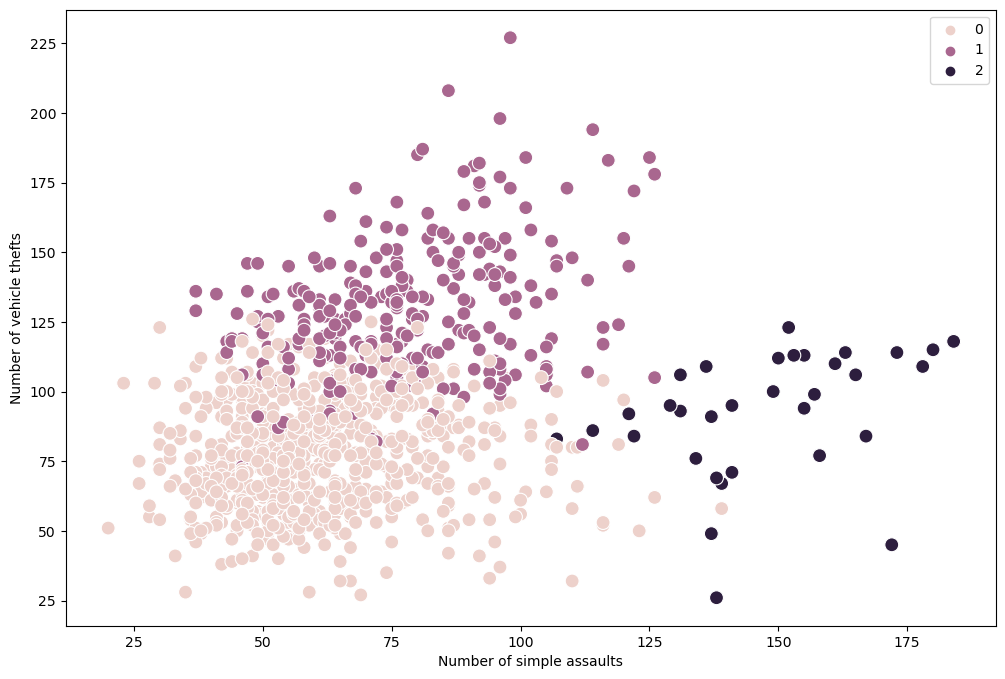

In [49]:
# Plot the clusters for the "THEFT OF IDENTITY" and "VEHICLE - STOLEN" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['BATTERY - SIMPLE ASSAULT'], y=sub['VEHICLE - STOLEN'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Number of simple assaults')
plt.ylabel('Number of vehicle thefts')
plt.show()

### "BURGLARY FROM VEHICLE" vs. "VEHICLE - STOLEN"

In [ ]:
sub.loc[sub['clusters'] == 2, 'cluster'] = 'dark purple'
sub.loc[sub['clusters'] == 1, 'cluster'] = 'purple'
sub.loc[sub['clusters'] == 0, 'cluster'] = 'pink'

In [51]:
sub.groupby('cluster').agg({'BURGLARY FROM VEHICLE':['mean', 'median'],
                          'VEHICLE - STOLEN':['mean', 'median'],
                            'BATTERY - SIMPLE ASSAULT':['mean', 'median']
                         })

BURGLARY FROM VEHICLE        VEHICLE - STOLEN         \
                             mean median             mean median   
cluster                                                            
dark purple            209.000000  205.0        92.060606   95.0   
pink                    50.483380   49.0        77.792244   77.0   
purple                  40.839416   36.0       130.361314  127.5   

            BATTERY - SIMPLE ASSAULT         
                                mean median  
cluster                                      
dark purple               147.515152  149.0  
pink                       61.066482   58.0  
purple                     77.930657   77.0

### Based on the median counts of the three crime types, the pink cluster stands out with its high value in the category of Vehicle - Stolen. The dark purple cluster exhibits high median counts of all three crime types, whereas the purple cluster shows low values for all three categories.

### For further analysis, we should look into the crime rate levels of areas included in the three clusters to characterize them.

## Merge and export data

In [52]:
sub.head()

,VEHICLE - STOLEN,BATTERY - SIMPLE ASSAULT,THEFT OF IDENTITY,BURGLARY FROM VEHICLE,BURGLARY,clusters,cluster
0,123,94,70,75,50,1,purple
1,45,172,30,144,23,2,dark purple
2,40,53,51,67,54,0,pink
3,69,51,45,37,35,0,pink
4,77,49,25,29,42,0,pink


In [53]:
sub.shape

(1029, 7)

In [54]:
# Merge the two dataframes to include both area_name and cluster columns
df_merged = pd.merge(df, sub, left_index=True, right_index=True)

In [55]:
# Remove duplicate columns
df_filtered = df_merged[['year_month', 'area_name', 'VEHICLE - STOLEN_x', 'BATTERY - SIMPLE ASSAULT_x', 'THEFT OF IDENTITY_x',
                        'BURGLARY FROM VEHICLE_x', 'BURGLARY_x', 'area_crime_rate', 'clusters', 'cluster']]

In [56]:
df_filtered.shape

(1029, 10)

In [57]:
df_filtered.head()

,year_month,area_name,VEHICLE - STOLEN_x,BATTERY - SIMPLE ASSAULT_x,THEFT OF IDENTITY_x,BURGLARY FROM VEHICLE_x,BURGLARY_x,area_crime_rate,clusters,cluster
0,2020-01,77TH STREET,123,94,70,75,50,High crime rate,1,purple
1,2020-01,CENTRAL,45,172,30,144,23,High crime rate,2,dark purple
2,2020-01,DEVONSHIRE,40,53,51,67,54,Low crime rate,0,pink
3,2020-01,FOOTHILL,69,51,45,37,35,Low crime rate,0,pink
4,2020-01,HARBOR,77,49,25,29,42,Medium crime rate,0,pink


In [58]:
df_filtered.to_csv(os.path.join(path, '02 Data','Prepared Data', 'crime_data_clusters.csv'))